# KNN Model for Accurate Heart Disease Prediction

Cardiovascular disease is the leading cause of death worldwide, accounting for 31% of all annual deaths. The goal of this analysis is to build a machine learning model to predict heart disease using the Heart Failure Prediction Dataset from Kaggle. The model will be based on the KNN classifier and key clinical features from the dataset. By developing an accurate predictive model, we can enable early detection and management of cardiovascular disease.

The model building process involved exploratory data analysis, data preprocessing, model training and evaluation. Key steps included handling missing values, encoding categorical variables, feature selection, hyperparameter tuning and cross-validation. Accuracy was used to evaluate model performance. 

After selecting the features most correlated with the target variable, including sex, chest pain type, maximum heart rate, the slope of the peak exercise ST segment, exercise-induced angina, oldpeak (ST), tuning the hyperparameters and cross-validation, the optimized KNN model with ball-tree algorithm, euclidean distance metric, 25 neighbors, and uniform weights achieved an accuracy of 84% on the test set.

This level of performance demonstrates the feasibility of using machine learning for heart disease prediction based on standard clinical inputs. The model can serve as a baseline for further refinement and validation on additional datasets. With more work, the model has potential to be a useful tool for early identification of patients at high risk of cardiovascular disease.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # suppressing Futire Warnings messages

import pandas as pd

Reading in the dataset.

In [2]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Checking for missing values.

In [3]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking the dtypes.

In [4]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

There are both numerical and categorical features in the dataset.

### Exploring Numerical Variables

In [5]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Blood pressure has a minimum value of zero, which is impossible for a living person.

Cholesterol level of zero is physiologically possible but highly unusual, for someone to have zero serum cholesterol, they would need to have very low innate cholesterol production and an extremely low dietary cholesterol intake.

We can also note that target variable is almost evenly distributed (the distribution is 55% - 45% towards patients with heart desease).

### Exploring Categorical Features

Next we will make some visualizations to understand how the categorical features are distributed.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # We will use fivethirtyeight style for visualization

%matplotlib inline
# Enables Jupyter to display graphs

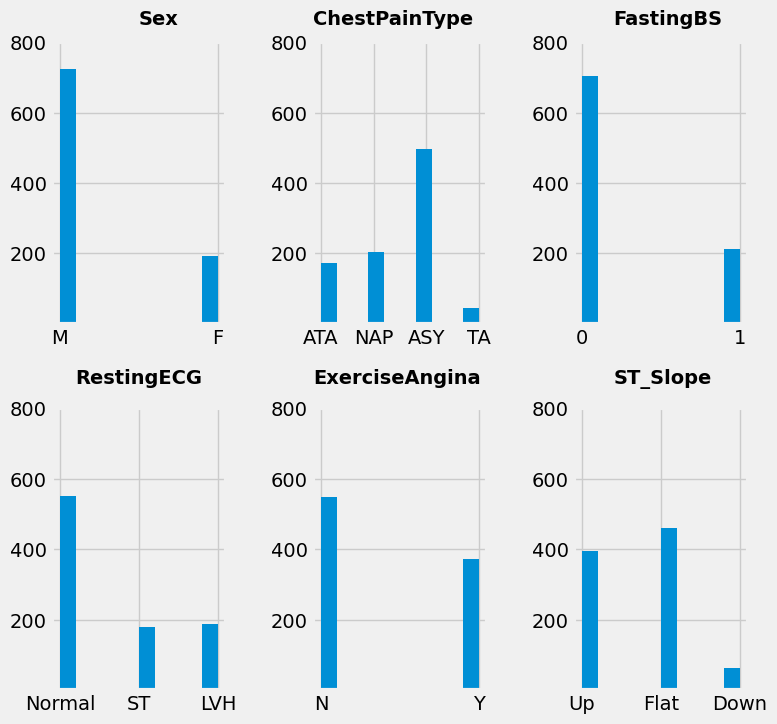

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8, 8), alpha=0.1)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1.hist(heart['Sex'])
ax2.hist(heart['ChestPainType'])
ax3.hist(heart['FastingBS'])
ax4.hist(heart['RestingECG'])
ax5.hist(heart['ExerciseAngina'])
ax6.hist(heart['ST_Slope'])

for ax in axes:
    ax.set_yticks(ticks=[200, 400, 600, 800])

ax1.text(0.5, 850, 'Sex', weight = 'bold')
ax1.text(1.6, 850, 'ChestPainType', weight = 'bold')
ax1.text(3.5, 850, 'FastingBS', weight = 'bold')
ax1.text(0.1, -170, 'RestingECG', weight = 'bold')
ax1.text(1.6, -170, 'ExerciseAngina', weight = 'bold')
ax1.text(3.5, -170, 'ST_Slope', weight = 'bold')

plt.subplots_adjust(wspace=0.5, hspace=0.3)

plt.show()

The distribution is skewed towards:
- males
- patients with asymptomatic chest pain type
- patients with fasting blood sugar less than 120 mg/dl
- patients with normal resting electrocardiogram results
- patients with not exercise-induced angina
- patients with flat and up slopes of the peak exercise ST segment

We will compare the distribution of categorical variables by target variable.

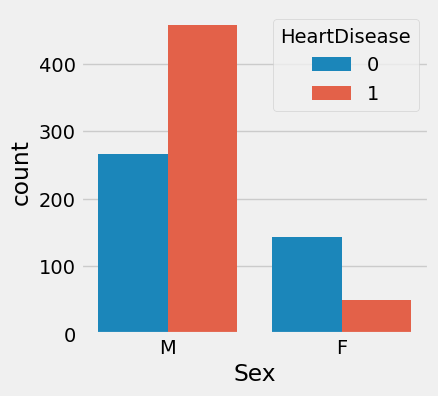

In [8]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = heart)
plt.show()

Males are more likely to have a heart disease than not, while the opposite is true for females.

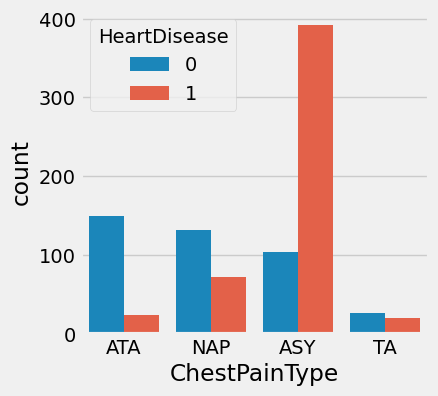

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'ChestPainType', hue = 'HeartDisease', data = heart)
plt.show()

The hightest count of patients with heart failures come from patients with asymptomatic chest pain, implying that those patients who had heart disease did not have chest pain as a symptom.

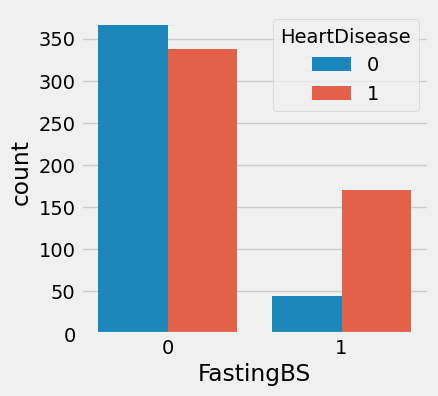

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'FastingBS', hue = 'HeartDisease', data = heart)
plt.show()

Patients with fasting blood sugar over 120 mg/dl appear to have a high risk of having a heart disease.

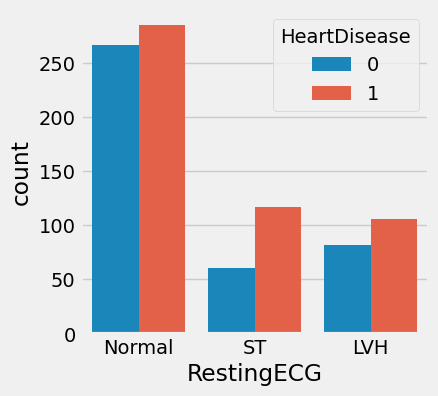

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'RestingECG', hue = 'HeartDisease', data = heart)
plt.show()

The distribution of heart diseases by resting ECG is skewed towards people having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).

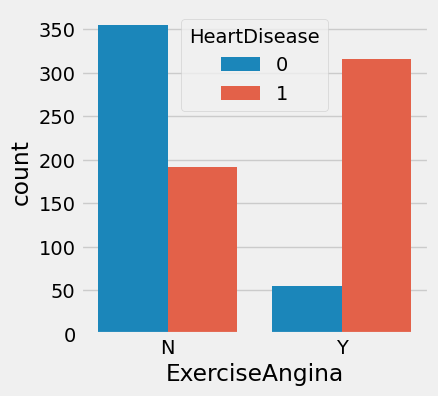

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'ExerciseAngina', hue = 'HeartDisease', data = heart)
plt.show()

Patients with exercise-induced angina appear to have the highest count of heart diseases.

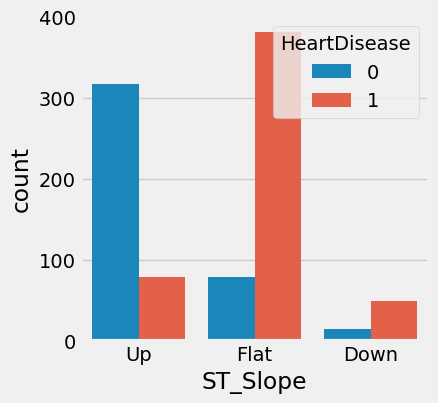

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'ST_Slope', hue = 'HeartDisease', data = heart)
plt.show()

Patients with the up slope of the peak exercise ST segment are much less likely to have heart disease.

## Cleaning the Data

We will clean up the RestingBP and Cholesterol columns that have zero values.

In [14]:
heart[heart['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Since it is only one row, we can remove it from the dataset.

In [15]:
heart_1 = heart[heart['RestingBP'] != 0].copy()
heart_1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
heart_1[heart_1['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Since there are 171 zero values, we will replace these with the median values of Cholesterol based on the HeartDisease values.

In [17]:
# Computing the mean cholesterol levels for patients with and without heart disease,
# excluding rows with zero cholesterol values
chol_mean_0, chol_mean_1 = heart_1[heart_1['Cholesterol'] != 0].groupby('HeartDisease').mean()['Cholesterol']
chol_mean_0, chol_mean_1

(238.76923076923077, 251.06179775280899)

In [18]:
# Replacing zero values
heart_1.loc[(heart_1['Cholesterol'] == 0) & (heart_1['HeartDisease'] == 0), 'Cholesterol'] = chol_mean_0
heart_1.loc[(heart_1['Cholesterol'] == 0) & (heart_1['HeartDisease'] == 1), 'Cholesterol'] = chol_mean_1

heart_1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,245.565666,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.409819,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,250.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Feature Selection

We will convert categorical variables into dummy variables and plot the pairwise Pearson's correlations.

In [19]:
# Converting categorical features into dummy variables
heart_2 = pd.get_dummies(heart_1, drop_first=True).copy()
heart_2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


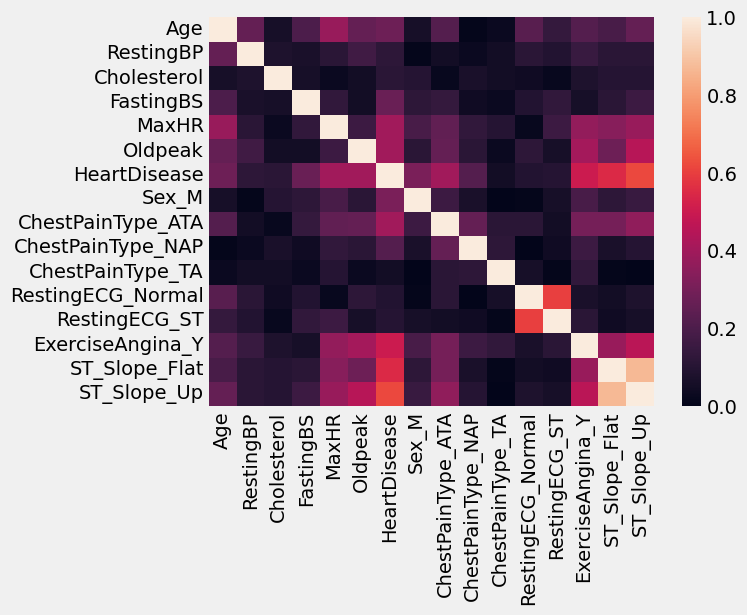

<Figure size 2500x2500 with 0 Axes>

In [20]:
# Plotting the pairwise correlations' heat map
sns.heatmap(abs(round(heart_2.corr(), 2)))
plt.figure(figsize=(25,25))
plt.show()

According to heatmap ST_Slope_Up, ST_Slope_Flat, ExerciseAngina_Y and few others appear to have evident correlation with the target variable.

We will sort correlations with HeartDisease in descending order next.

In [21]:
abs(heart_2.corr())['HeartDisease'].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
MaxHR                0.401410
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
ChestPainType_NAP    0.215311
RestingBP            0.117990
Cholesterol          0.114495
RestingECG_ST        0.103067
RestingECG_Normal    0.092452
ChestPainType_TA     0.054591
Name: HeartDisease, dtype: float64

We will select the following features with correlation coefficient greater than 0.3 for our model:
- ST_Slope_Up
- ST_Slope_Flat
- ExerciseAngina_Y
- Oldpeak
- ChestPainType_ATA
- MaxHR
- Sex_M

In [22]:
heart_3 = heart_2[['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y',
                   'Oldpeak', 'ChestPainType_ATA', 'MaxHR', 'Sex_M', 'HeartDisease']]
heart_3

,ST_Slope_Up,ST_Slope_Flat,ExerciseAngina_Y,Oldpeak,ChestPainType_ATA,MaxHR,Sex_M,HeartDisease
0,1,0,0,0.0,1,172,1,0
1,0,1,0,1.0,0,156,0,1
2,1,0,0,0.0,1,98,1,0
3,0,1,1,1.5,0,108,0,1
4,1,0,0,0.0,0,122,1,0
...,...,...,...,...,...,...,...,...
913,0,1,0,1.2,0,132,1,1
914,0,1,0,3.4,0,141,1,1
915,0,1,1,1.2,0,115,1,1
916,0,1,0,0.0,1,174,0,1


## Building a Classifier

Next we will split the data set into training and validation sets and fit our KNN model.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Splitting the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(heart_3.drop(['HeartDisease'], axis=1),
                                                    heart_3['HeartDisease'],
                                                    test_size=0.2,
                                                   random_state=111)

In [25]:
features_1 = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y',
                   'Oldpeak', 'ChestPainType_ATA', 'MaxHR', 'Sex_M']

for f in features_1:
    model = KNeighborsClassifier() # instantiating the KNN model
    
    model.fit(X_train[[f]], y_train) # fitting the model on training set for each single feature
    
    print('Accuracy of the model with feature', f, 'is', round(model.score(X_val[[f]], y_val), 2))
    # Evaluating the accuracy of the model on the validation set

Accuracy of the model with feature ST_Slope_Up is 0.83
Accuracy of the model with feature ST_Slope_Flat is 0.79
Accuracy of the model with feature ExerciseAngina_Y is 0.71
Accuracy of the model with feature Oldpeak is 0.69
Accuracy of the model with feature ChestPainType_ATA is 0.4
Accuracy of the model with feature MaxHR is 0.66
Accuracy of the model with feature Sex_M is 0.4


Best single-feature KNN-models are ST_Slope_Up, ST_Slope_Flat, and ExerciseAngina_Y models.

Next we will normalize the features and train the model on all features simultaneously.

### Normalizing the Features

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Fitting the Model

In [28]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
print('Accuracy of the model is', round(model.score(X_val_scaled, y_val), 2))

Accuracy of the model is 0.79


The accuracy of the model with all features is slightly worse than models with single features T_Slope_Up and ST_Slope_Flat.

We will try to improve the accuracy by tuning the hyperparameters.

### Hyperparameter Tuning

In [29]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(heart_3.drop(['HeartDisease'], axis=1),
                                                    heart_3['HeartDisease'],
                                                    test_size=0.15,
                                                   random_state=111)

In [30]:
# Normalizing the features
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [31]:
# Setting the parameters for KNN we will look through
parameters = {'n_neighbors' : [1, 25, 51, 75, 101, 125, 151],
             'weights' : ('uniform', 'distance'),
              'metric' : ('l1', 'l2'),
              'algorithm' : ('ball_tree', 'kd_tree', 'brute')}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Starting the grid search
model = KNeighborsClassifier()
gs = GridSearchCV(model, parameters, scoring='accuracy')
gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'metric': ('l1', 'l2'),
                         'n_neighbors': [1, 25, 51, 75, 101, 125, 151],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [34]:
print(gs.best_params_, gs.best_score_)

{'algorithm': 'ball_tree', 'metric': 'l2', 'n_neighbors': 25, 'weights': 'uniform'} 0.8447146401985112


The best model with ball-tree algorithm, euclidean distance metric, 25 neighbors, and uniform weights shows accuracy of 84.47% on the training set, which is better than single-feature models and previous all-features model.

Next we will evaluate this model on the test set.

## Model Evaluation

In [35]:
# Scaling the features of the test set
X_test_scaled = scaler.transform(X_test)

print(gs.best_estimator_.score(X_test_scaled, y_test))

0.8405797101449275


The accuracy of the model on the test set is 84.06%, which is quite good.

# Conclusion

This analysis set out to develop a machine learning model for predicting heart disease risk using clinical data. The KNN classifier was selected as the predictive modeling approach. After data preprocessing and feature selection, a KNN model was trained and optimized using techniques like hyperparameter tuning and cross-validation. 

The final model demonstrated promising performance with 84% accuracy on the test set. Key predictors included sex, chest pain type, exercise ECG results, and other clinical inputs. This level of predictive accuracy indicates machine learning has potential for early identification of patients at high risk of cardiovascular disease. 

While more refinement is needed, this project established a baseline KNN model using real-world clinical data. With further validation on additional datasets, the model could eventually serve as a useful tool for physicians to assess heart disease risk. The next steps would involve expanding the feature set and trialing other classifiers to improve generalizability. Overall, the results support the feasibility of an ML approach for heart disease prediction based on standard inputs.